In [1]:
# Winsconsin Breast Cancer Data Set
# 암세포의 특징 10개에 대해서
# 평균, 표준편차, 최대이상치에 대한 전처리

# 필요한 module import
from sklearn.datasets import load_breast_cancer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.model_selection import cross_val_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision, BinaryAccuracy

In [2]:
# 1. Raw Data Loading
cancer = load_breast_cancer()

# Bunch 클래스는 sklearn에서 제공하는 class로
# Python의 dict와 유사하다고 생각하면되요!
print(type(cancer)) # <class 'sklearn.utils._bunch.Bunch'>

# data 속성(key값)이 있는데 feature가 들어있어요!
# target 속성(ket값)이 있는데 label이 들어가 있어요!
print(cancer.data.shape) # (569, 30)
print(cancer.target.shape) # (569,)

# target안에 어떤 값이 들어가 있는지 확인하고 싶어요!
# 데이터 불균형이 있는지 같이 확인하고 싶어요!
print(np.unique(cancer.target, return_counts=True)) # (array([0, 1]), array([212, 357]))
# 약간의 불균형이 있기는 하지만 일단 그냥 넘어가요!

<class 'sklearn.utils._bunch.Bunch'>
(569, 30)
(569,)
(array([0, 1]), array([212, 357]))


In [3]:
print(cancer.DESCR)
# class 0은 악성 세포, class 1은 양성 세포
# 여기에 나오는 각종 수치들(feature에 대한 수치들)
# 이게 어떤 의미인지 다 알아야 하나요?
# 머신러닝 모델을 구현하는 입장에서 이 수치들의 의미를 다 알 필요는 없어요!
# But, 알면 좋아요!
# 도메인 전문가가 있으면 좋아요!

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [3]:
# 데이터 셋 저장
x_data = cancer.data # 2차원 ndarray
t_data = cancer.target # 1차원 ndarray

In [5]:
# 데이터 전처리
# DataFrame을 만들어서 처리하면 좋을것 같아요!
x_data_df = pd.DataFrame(x_data)
t_data_df = pd.DataFrame(t_data.reshape(-1, 1))

df = pd.concat([t_data_df, x_data_df], axis=1)
display(df.head())
df.info()

,0,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   0       569 non-null    float64
 2   1       569 non-null    float64
 3   2       569 non-null    float64
 4   3       569 non-null    float64
 5   4       569 non-null    float64
 6   5       569 non-null    float64
 7   6       569 non-null    float64
 8   7       569 non-null    float64
 9   8       569 non-null    float64
 10  9       569 non-null    float64
 11  10      569 non-null    float64
 12  11      569 non-null    float64
 13  12      569 non-null    float64
 14  13      569 non-null    float64
 15  14      569 non-null    float64
 16  15      569 non-null    float64
 17  16      569 non-null    float64
 18  17      569 non-null    float64
 19  18      569 non-null    float64
 20  19      569 non-null    float64
 21  20      569 non-null    float64
 22  21

In [ ]:
# 결측치가 있는지 확인해 보아요!
df.columns[df.isnull().any(axis=0)]
# 결측치는 존재하지 않네요!

Index([], dtype='int64')

In [ ]:
# 이상치 처리
# 각 컬럼마다 이상치를 찾아서 제거해서 사용할거에요!
# 사실 데이터이기 때문에 이상치로 판별은 되지만
# 실제값이에요! 따라서 삭제하면 안되요!
# 나중에 한번 이상치 처리는 따로 해본 후
# 모델을 만들어서 모델의 정확도를 비교해보세요!

In [ ]:
# 정규화 처리
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)
print(x_data_norm)

In [ ]:
# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm, t_data,
                 test_size=0.2, stratify=t_data,
                 random_state=2) # stratify : 데이터를 나눌 기준!

# 분리된 데이터의 class 비율이 유지되고 있는지 확인!
print(np.unique(t_data_train, return_counts=True)) # [170, 285]
print(np.unique(t_data_test, return_counts=True)) # [42, 72]
# [212, 357] => [170, 285], [42, 72]

(array([0, 1]), array([170, 285]))
(array([0, 1]), array([42, 72]))


In [ ]:
# Model 구현
sklearn_model = linear_model.LogisticRegression()
sklearn_model.fit(x_data_train_norm, t_data_train)

print(sklearn_model.score(x_data_test_norm, t_data_test)) # 0.9649122807017544 (accuracy)

0.9649122807017544


In [ ]:
# 모델을 생성한 휴 Cross Validation을 진행
score = cross_val_score(sklearn_model, x_data_train_norm, t_data_train, cv=5) # K-fold cross Validation (sklearn 모델만 가능)

print(score.mean()) # 0.9648351648351647

0.9648351648351647


In [ ]:
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(30,)))
keras_model.add(Dense(units=1, activation='sigmoid'))

keras_model.compile(optimizer=Adam(learning_rate=1e-4),
                    loss='binary_crossentropy',
                    metrics=['acc'])

history = keras_model.fit(x_data_train_norm, t_data_train.reshape(-1, 1),
                          epochs=1000, verbose=1,
                          validation_split=0.2,
                          batch_size=100) # val_acc: 0.9121 - val_loss: 0.5112

In [ ]:
result = keras_model.evaluate(x_data_test_norm, t_data_test.reshape(-1, 1))

print(result) # [0.544389009475708, 0.8421052694320679]
# 첫번째 값은 loss, 두번째 값은 accuracy

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.8723 - loss: 0.5478
[0.544389009475708, 0.8421052694320679]


<class 'keras.src.callbacks.history.History'>
{'acc': [0.2527472674846649, 0.2527472674846649, 0.2527472674846649, 0.25549450516700745, 0.2637362778186798, 0.2609890103340149, 0.2609890103340149, 0.26648351550102234, 0.2637362778186798, 0.26648351550102234, 0.26648351550102234, 0.26923078298568726, 0.26923078298568726, 0.26923078298568726, 0.26923078298568726, 0.26923078298568726, 0.26923078298568726, 0.2747252881526947, 0.27747252583503723, 0.27747252583503723, 0.28021979331970215, 0.28021979331970215, 0.2857142984867096, 0.2884615361690521, 0.2884615361690521, 0.2884615361690521, 0.2884615361690521, 0.2884615361690521, 0.29120880365371704, 0.2967033088207245, 0.2967033088207245, 0.2967033088207245, 0.299450546503067, 0.30219781398773193, 0.30494505167007446, 0.30494505167007446, 0.3104395568370819, 0.3104395568370819, 0.3104395568370819, 0.31593406200408936, 0.3186813294887543, 0.3214285671710968, 0.3214285671710968, 0.32692307233810425, 0.32967033982276917, 0.3324175775051117, 0.332

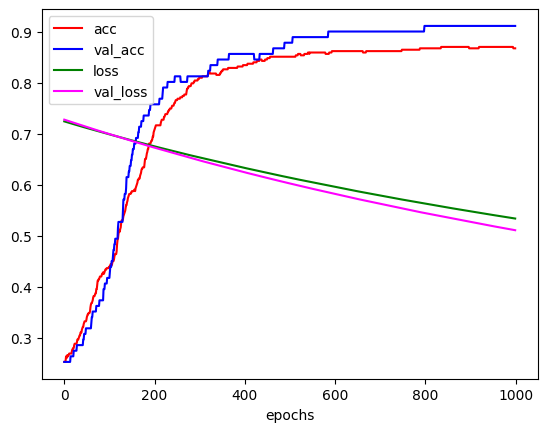

In [ ]:
print(type(history))

# 우리가 원하는 loss와 accuracy에 대한 데이터는 history 객체에 history 속성에 들어있어요!
print(history.history)

plt.xlabel('epochs')
plt.plot(history.history['acc'], color='r')
plt.plot(history.history['val_acc'], color='b')
plt.plot(history.history['loss'], color='g')
plt.plot(history.history['val_loss'], color='magenta')
plt.legend(['acc','val_acc', 'loss', 'val_loss'])
plt.show()

In [ ]:
keras_model = Sequential()

keras_model.add(Flatten(input_shape=(30,)))
keras_model.add(Dense(units=1, activation='sigmoid'))

keras_model.compile(optimizer=Adam(learning_rate=1e-2),
                    loss='binary_crossentropy',
                    metrics=['acc'])

history = keras_model.fit(x_data_train_norm, t_data_train.reshape(-1, 1),
                          epochs=1000, verbose=1,
                          validation_split=0.2,
                          batch_size=100) # val_acc: 0.9121 - val_loss: 0.5112

In [ ]:
result = keras_model.evaluate(x_data_test_norm, t_data_test)

print(result) # [0.544389009475708, 0.8421052694320679]
# 첫번째 값은 loss, 두번째 값은 accuracy

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - acc: 0.9857 - loss: 0.0615
[0.0647239163517952, 0.9824561476707458]


<class 'keras.src.callbacks.history.History'>
{'acc': [0.656593382358551, 0.7719780206680298, 0.8296703100204468, 0.8571428656578064, 0.8598901033401489, 0.8598901033401489, 0.8598901033401489, 0.8653846383094788, 0.8681318759918213, 0.8681318759918213, 0.8708791136741638, 0.8708791136741638, 0.8736263513565063, 0.8763736486434937, 0.8763736486434937, 0.8763736486434937, 0.8708791136741638, 0.8763736486434937, 0.8763736486434937, 0.8791208863258362, 0.8791208863258362, 0.8736263513565063, 0.8736263513565063, 0.8791208863258362, 0.8818681240081787, 0.8818681240081787, 0.8818681240081787, 0.8818681240081787, 0.8846153616905212, 0.8846153616905212, 0.8846153616905212, 0.8846153616905212, 0.8846153616905212, 0.8846153616905212, 0.8846153616905212, 0.8901098966598511, 0.8928571343421936, 0.8928571343421936, 0.8901098966598511, 0.8901098966598511, 0.8956043720245361, 0.8956043720245361, 0.8956043720245361, 0.8956043720245361, 0.8983516693115234, 0.901098906993866, 0.901098906993866, 0.903846

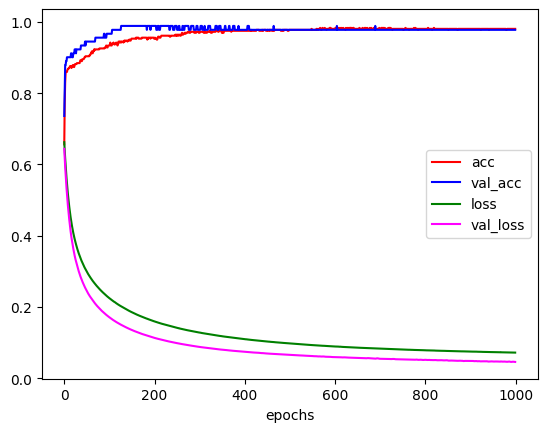

In [ ]:
print(type(history))

# 우리가 원하는 loss와 accuracy에 대한 데이터는 history 객체에 history 속성에 들어있어요!
print(history.history)

plt.xlabel('epochs')
plt.plot(history.history['acc'], color='r')
plt.plot(history.history['val_acc'], color='b')
plt.plot(history.history['loss'], color='g')
plt.plot(history.history['val_loss'], color='magenta')
plt.legend(['acc','val_acc', 'loss', 'val_loss'])
plt.show()